# Gather movie information 

In [2]:
import bs4
import requests 
from bs4 import BeautifulSoup
import pandas as pd 
import matplotlib as plt 
import numpy as np

In [3]:
movie_df = pd.read_csv("movies_metadata.csv")
print (movie_df.shape)
movie_df.head()

(45466, 24)


/Users/haoranyu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
def get_movie_by_year(year, movie_df):
    """
    This function gets the movies that has box office and are in English language that are released in the given year. 
    """
    movie_df["movie_release_year"] = movie_df["release_date"].apply(lambda x: str(x).split("-")[0])
    movie_df_year = movie_df[movie_df["movie_release_year"] == str(year)]
    return movie_df_year[movie_df_year["revenue"] > 0][movie_df_year["original_language"] == "en"]
    
    


In [5]:
movie_2016_selected_df = get_movie_by_year(2016, movie_df)
movie_2016_selected_df.shape

/Users/haoranyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


(233, 25)

All movies that has box office and are in English language in 2016 are stored in the dataframe "movie_2016_selected_df"

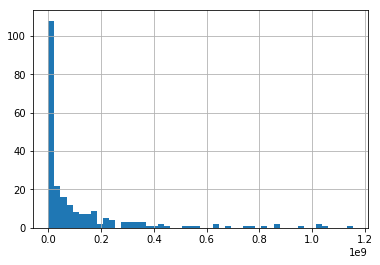

In [10]:
# EDA 
ax = movie_2016_selected_df.revenue.hist(bins = 50)
ax

# Collecting reviewa about movies in movie_2016_selected_df from rotten tomatoes

In [11]:
movie_2016_selected_df

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,movie_release_year
26556,False,NaN,100000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.benhurmovie.com/,271969,tt2638144,en,Ben-Hur,A falsely accused nobleman survives years of s...,...,9.406131e+07,125.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,First to finish. Last to die.,Ben-Hur,False,5.3,642.0,2016
26557,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.warcraft-themovie.com/,68735,tt0803096,en,Warcraft,The peaceful realm of Azeroth stands on the br...,...,4.336772e+08,123.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Two worlds. One home.,Warcraft,False,6.3,2325.0,2016
26564,False,"{'id': 448150, 'name': 'Deadpool Collection', ...",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,Deadpool tells the origin story of former Spec...,...,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444.0,2016
26567,False,"{'id': 131295, 'name': 'Captain America Collec...",250000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://marvel.com/captainamericapremiere,271110,tt3498820,en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",...,1.153304e+09,147.0,"[{'iso_639_1': 'ro', 'name': 'Română'}, {'iso_...",Released,Divided We Fall,Captain America: Civil War,False,7.1,7462.0,2016
26568,False,NaN,165000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://marvel.com/doctorstrange,284052,tt1211837,en,Doctor Strange,"After his career is destroyed, a brilliant but...",...,6.777184e+08,115.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Open your mind. Change your reality.,Doctor Strange,False,7.1,5880.0,2016
26569,False,"{'id': 748, 'name': 'X-Men Collection', 'poste...",178000000,"[{'id': 878, 'name': 'Science Fiction'}]",http://www.foxmovies.com/movies/x-men-apocalypse,246655,tt3385516,en,X-Men: Apocalypse,After the re-emergence of the world's first mu...,...,5.439348e+08,144.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Only the strong will survive,X-Men: Apocalypse,False,6.4,4831.0,2016
27861,False,NaN,3500000,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",http://sonyclassics.com/thebronze/,308453,tt3859304,en,The Bronze,"In 2004, Hope Ann Greggory became an American ...",...,6.158160e+05,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,There's no place like third.,The Bronze,False,5.5,112.0,2016
28811,False,NaN,18000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",http://www.midnightspecialmovie.com/,245703,tt2649554,en,Midnight Special,A father and son go on the run after the dad l...,...,6.212282e+06,112.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,He's not like us.,Midnight Special,False,6.2,705.0,2016
30400,False,"{'id': 283579, 'name': 'Divergent Collection',...",110000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 878, ...",http://www.thedivergentseries.movie/#allegiant,262504,tt3410834,en,Allegiant,Beatrice Prior and Tobias Eaton venture into t...,...,1.792469e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Break the boundaries of your world,Allegiant,False,5.9,2064.0,2016
30401,False,"{'id': 435259, 'name': 'Fantastic Beasts Colle...",180000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",http://www.fantasticbeasts.com/,259316,tt3183660,en,Fantastic Beasts and Where to Find Them,"In 1926, Newt Scamander arrives at the Magical...",...,8.093423e+08,133.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,From J.K. Rowling's wizarding world.,Fantastic Beasts and Where to Find Them,False,7.2,5612.0,2016


In [22]:
import re

def format_movie_name(movie_name): 
    movie_name = movie_name.replace("&", " and ")
    movie_name = movie_name.replace("'", "")
    word_list = list(filter(lambda x: len(x) != 0, re.split('[^0-9a-zA-Z]', movie_name)))
    s = "_"
    return s.join(word_list)



In [23]:
def get_reviews(selected_df, year):
    url_part_one = "https://www.rottentomatoes.com/m/"
    url_part_two = "/reviews/"
    for movie in selected_df.original_title:
        movie_string = format_movie_name(movie)
        url = url_part_one + movie_string + "_" + str(year) + url_part_two
        response = requests.get(url, allow_redirects=False)
        if response.status_code == 200:
            print ("MULTIPLE: " + movie)
        if response.status_code != 200:
            url = url_part_one + movie_string + url_part_two
            response = requests.get(url)
        if response.status_code == 404:
            print ("cannot find " + movie)
        
        
"""
        #print("Response text: %s\n" %(response.text))
        #print("Response headers: %s\n" %(response.headers))
        root = BeautifulSoup(response.content,"html.parser")
        for review in root.findAll("div", {"class": "the_review"}):
            #reviews.append(review.text)
            print (review.text)
            print ("_________________")
        #return reviews, len(reviews)
"""

'\n        #print("Response text: %s\n" %(response.text))\n        #print("Response headers: %s\n" %(response.headers))\n        root = BeautifulSoup(response.content,"html.parser")\n        for review in root.findAll("div", {"class": "the_review"}):\n            #reviews.append(review.text)\n            print (review.text)\n            print ("_________________")\n        #return reviews, len(reviews)\n'

In [24]:
get_reviews(movie_2016_selected_df, 2016)


MULTIPLE: Ben-Hur
MULTIPLE: Doctor Strange
MULTIPLE: Criminal
MULTIPLE: Suicide Squad
MULTIPLE: Batman v Superman: Dawn of Justice
MULTIPLE: The Jungle Book
MULTIPLE: The Witch
MULTIPLE: Green Room
MULTIPLE: Demolition
MULTIPLE: Hail, Caesar!
MULTIPLE: The 5th Wave
MULTIPLE: How to Be Single
MULTIPLE: Krisha
MULTIPLE: The Forest
MULTIPLE: Maggie's Plan
MULTIPLE: Exposed
MULTIPLE: Risen
MULTIPLE: Holy Hell
MULTIPLE: The Birth of a Nation
MULTIPLE: Miles Ahead
MULTIPLE: Race
cannot find 美人鱼
MULTIPLE: Elvis & Nixon
MULTIPLE: Mr. Right
MULTIPLE: Florence Foster Jenkins
MULTIPLE: Keanu
MULTIPLE: Nine Lives
MULTIPLE: Barbershop: The Next Cut
MULTIPLE: Our Kind of Traitor
MULTIPLE: The Boss
MULTIPLE: Precious Cargo
MULTIPLE: Mother's Day
MULTIPLE: The BFG
MULTIPLE: The Meddler
MULTIPLE: The Darkness
cannot find Pelé: Birth of a Legend
MULTIPLE: Ghostbusters
MULTIPLE: Cell
MULTIPLE: Genius
MULTIPLE: Lights Out
MULTIPLE: Pete's Dragon
MULTIPLE: The Duel
MULTIPLE: Goat
MULTIPLE: Satanic
MULTIPLE